Vicente De Leon

Deep Learning Principles: Homework 5

UID: 2001014594

In [ ]:
!pip install -q -U tensorflow

# Dependencies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline


import torch
from torch.utils.data import TensorDataset
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.parallel
import torch.utils.data
from torch.autograd import Variable

import tensorflow as tf
from sklearn import metrics
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.utils.vis_utils import plot_model

The following dataframe shows CustomerID column being the unique identifier of each customer. Columns from A1 to A14 are just random values (numerical values) and the Class column is the target variable 1 or 0.

In [ ]:
df = pd.read_csv('Credit_Card_Applications-1.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


# Data Cleaning and Pre-processing

In [ ]:
# checking for missing values
print(df.isnull().sum()) # it looks like we have no missing values within the dataset

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64


In [ ]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [ ]:
# df['Class'] = df['Class'].astype('category')  normal vs fraudulent (binary outcome 0 vs 1) convert to category

In [ ]:
df['Class'].value_counts()

0    383
1    307
Name: Class, dtype: int64

In [ ]:
duplicates = df.duplicated()
print(' Are there any duplicates?:' , duplicates.sum())

 Are there any duplicates?: 0


In [ ]:
df.drop('CustomerID', axis = 1, inplace = True) #Dropping CustomerID column (no value to our analysis)

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [ ]:
Total_transactions = len(df)
normal = len(df[df.Class == 0])
fraudulent = len(df[df.Class == 1])
fraudulent_percentage = round(fraudulent/normal*100, 2)


print('Total number of transactions are {}'.format(Total_transactions))
print('Number of normal transactions are {}'.format(normal))
print('Number of fraudulent transactions are {}'.format(fraudulent))
print('Percentage of fraudulent transactions is {}'.format(fraudulent_percentage))

Total number of transactions are 690
Number of normal transactions are 383
Number of fraudulent transactions are 307
Percentage of fraudulent transactions is 80.16


I will use `MinMax Scaler` for data pre-processing in the dataset. The minimum feature is made equal to zero and the maximum of feature equal to one. This step shrinks the data within the given range, sually of 0 to 1. It scales the values to a specific value range without changing the shape of the original distribution. Also, there's no need for me to one-hot encode the Class column because it already has 1 and 0 values (binary values) representation.

In [ ]:
scaler = MinMaxScaler()

numeric_columns = df.select_dtypes(include = 'number').columns # selecting all the floats and integer columns

df[numeric_columns] = scaler.fit_transform(df[numeric_columns]) # applying the MinMaxScaler()

The dataframe shows that the values on the columns now range between 0 and 1. (This allow features to have a consistent scale).

In [ ]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05,0.01212,0.0
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08,0.00000,0.0
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14,0.00000,0.0
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00,0.00000,1.0
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03,0.00158,1.0


# Question 1 and Question 2

## RBM Model

Lets do some basic train test splitting using APML parameters -> test_size=0.2 and random_state=42

In [ ]:
# PyTorch Model

X = df.drop('Class', axis=1) # input data
y = df['Class'] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(552, 14)

In [ ]:
X_test.shape

(138, 14)

The following conversion came from Applied Machine Learning Homework and Final Project Submission 3 (PyTorch). I must say that I personally felt PyTorch was more challenging than TensorFlow.

In [ ]:
X_train = X_train.values # converting Numpy Array
X_test = X_test.values # converting Numpy Array
y_train = y_train.values # converting Numpy Array
y_test = y_test.values # converting Numpy Array

In [ ]:
X_train_torch = torch.from_numpy(X_train) # converting the arrays into Tensors
X_test_torch = torch.from_numpy(X_test) # converting the arrays into Tensors
y_train_torch = torch.from_numpy(y_train) # converting the arrays into Tensors
y_test_torch = torch.from_numpy(y_test) # converting the arrays into Tensors

In [ ]:
X_train_torch = X_train_torch.float() # float conversion
X_test_torch = X_test_torch.float()
y_train_torch = y_train_torch.float()
y_test_torch = y_test_torch.float()

In [ ]:
train_data = TensorDataset(X_train_torch, y_train_torch) # PyTorch dataset
test_data = TensorDataset(X_test_torch, y_test_torch) # PyTorch dataset

Is it a PyTorch dataset?

In [ ]:
def pytorch_dataset(data):
  return isinstance(data, Dataset)

In [ ]:
if pytorch_dataset(train_data):
    print('Dataset is a PyTorch dataset.')
else:
    print('Dataset is not a PyTorch dataset.')

Dataset is a PyTorch dataset.


In [ ]:
X_train_torch.shape[0]

552

In [ ]:
X_train_torch.shape[1]

14

`RBM Model`

RBM is one of the two types of deep learning that use normal transactions to detect fraud in real-time. The RBMs models are good at Handling unlabeled data and extract important features from the input.

These models fall under the category of energy based models. It is a generative stochastic model which consists of two layers of visible and hidden layers, they are connected by symmetrical bipartite graph. The name “Restricted” came from the fact that there is no intra-layer connection, every node in the visible layer is connected to every node in the hidden layer but no two nodes in the same layer are connected to each other.

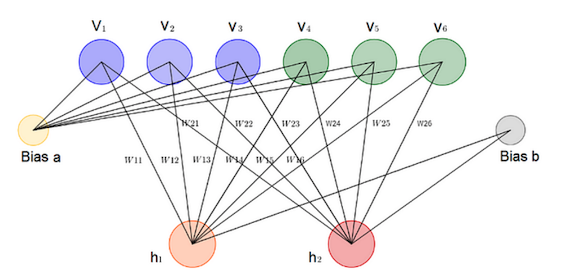


* A bipartite graph is a graph whose vertices can be divided into two disjoint and independent sets and such that every edge connects a vertex in to one in.

The design of RBMs is different from other deep learning, because there is no output layer.

I tried to use the SKlearn BernoulliRBM in order to perform the RBM model, however there's no way I can play with epochs nor different optimizers (Adam vs SGD).

In [ ]:
#logistic = LogisticRegression()
#rbm = BernoulliRBM(random_state=0, verbose=True)

#sklearn_rbm_model = Pipeline([
                      #('rbm', rbm),
                      #('logistic', logistic)]
                    #)

SGD and Adam optimizers are the two optimizers I will be using for my experiments. Professor James Shanahan always told me that Adam is the optimizer that will return the best results. Even though I have no experience regarding RBMs model, I hope that after following the RBM class work structure I will achieve some good results. My architecture might be week and many important parameters might be left out, but I will try and implement a couple of new parameters into the basic class RBM model.

In [ ]:
sgd_optimizer = torch.optim.SGD
adam_optimizer = torch.optim.Adam

I decided to include `trch.nn.Parameter()` into the RBM1 class to register W, a, and b as trainable parameters of the model. Also, a line code regarding optimizer was included to play around with any optimizer of personal choice. The learning rate and weight decay (L2 regularization technique) were also added in order to get better results. That weight_decay was also part of my applied Machine Learning Final project during the PyTorch Cats vs Dogs implementation. Other additional steps were adding the zero_grad() to zero out gradients of parameters in the optimizer and the MSE between v0 and vk which is going to be the loss value. It was also extremely useful that the Cats and Dogs images were splitted using sklearn train_test_split so I had to used PyTorch Datasets and DataLoaders.

In [ ]:
class RBM1():
  def __init__(self, nv, nh, optimizer, lr, weight_decay):
    self.W = torch.nn.Parameter(torch.randn(nh, nv))
    self.a = torch.nn.Parameter(torch.randn(1, nh))
    self.b = torch.nn.Parameter(torch.randn(1, nv))
    self.optimizer = optimizer([self.W, self.a, self.b], lr=lr, weight_decay=weight_decay) # adding lr and regularization

  def sample_h(self, x):
    wx = torch.mm(x, self.W.t())
    activation = wx + self.a.expand_as(wx)
    p_h_given_v = torch.sigmoid(activation) # sigmoid
    return p_h_given_v, torch.bernoulli(p_h_given_v) # RBM

  def sample_v(self, y):
    wy = torch.mm(y, self.W)
    activation = wy + self.b.expand_as(wy)
    p_v_given_h = torch.sigmoid(activation) # sigmoid
    return p_v_given_h, torch.bernoulli(p_v_given_h) # RBM

  def train(self, v0, vk, ph0, phk):
    self.optimizer.zero_grad() # zero out gradients of parameters in the optimizer
    self.W += (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
    self.b += torch.sum((v0 - vk), 0)
    self.a += torch.sum((ph0 - phk), 0)
    self.optimizer.step()
    loss = torch.mean((v0 - vk) ** 2) # claculating loss -> MSE between v0 and vk
    return loss

nv = X_train_torch.shape[1] # visible nodes -> 14 (columns from A1 to A14)
nh = 100
batch_size = 100
lr = 0.01 # random
weight_decay = 0.001 # random

In [ ]:
rbm_sgd = RBM1(nv, nh, adam_optimizer, lr, weight_decay)
rbm_adam = RBM1(nv, nh, sgd_optimizer, lr, weight_decay)

### RBM Model SGD Optimizer

DataLoader was created to iterate through the dataset as needed. This was based on Applied Machine Learning Coursework regarding Final Project (Cats vs Dogs image datasets). The same process will be applied to the testing section.

In [ ]:
 # DataLoader for batch processing and setting suffle to True for better learning process
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

for v0, _ in train_loader is used to create batches of data. The v0.clone() from PyTorch was used to create a clone of v0 (also the 14 visible nodes from the data) to keep the original v0 intact while updating vk (like the modify version of the original input v0 after the sampling process) during the sampling process. The same process will be implemented for the testing section.

In [ ]:
epochs = 40

for epoch in range(1, epochs + 1):
    train_loss = 0 # initialize loss
    s = 0. # initialize counter
    for v0, _ in train_loader: # batch extraction
        vk = v0.clone() # PyTorch clone()
        ph0,_ = rbm_sgd.sample_h(v0) # (sgd optimizer). calculating prob of hidden nodes given v0 (original visble nodes)
        for k in range(10):
            _,hk = rbm_sgd.sample_h(vk) # guess of input data
            _,vk = rbm_sgd.sample_v(hk) # new set of guess for input data
            vk[v0<0] = v0[v0<0] # updating vk to retain original values where v0 is less than 0
        phk,_ = rbm_sgd.sample_h(vk) # calculating prob of hidden nodes given vk
        with torch.no_grad(): # disables gradient calculation
            train_loss += rbm_sgd.train(v0, vk, ph0, phk) # training rbm model using original input batch and visible nodes. proceed to add loss
        s += 1. # increment s by 1

    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

epoch: 1 loss: tensor(0.3115)
epoch: 2 loss: tensor(0.2413)
epoch: 3 loss: tensor(0.2560)
epoch: 4 loss: tensor(0.2687)
epoch: 5 loss: tensor(0.2657)
epoch: 6 loss: tensor(0.2730)
epoch: 7 loss: tensor(0.2661)
epoch: 8 loss: tensor(0.2698)
epoch: 9 loss: tensor(0.2655)
epoch: 10 loss: tensor(0.2704)
epoch: 11 loss: tensor(0.2671)
epoch: 12 loss: tensor(0.2672)
epoch: 13 loss: tensor(0.2611)
epoch: 14 loss: tensor(0.2748)
epoch: 15 loss: tensor(0.2703)
epoch: 16 loss: tensor(0.2590)
epoch: 17 loss: tensor(0.2665)
epoch: 18 loss: tensor(0.2788)
epoch: 19 loss: tensor(0.2610)
epoch: 20 loss: tensor(0.2733)
epoch: 21 loss: tensor(0.2630)
epoch: 22 loss: tensor(0.2778)
epoch: 23 loss: tensor(0.2596)
epoch: 24 loss: tensor(0.2841)
epoch: 25 loss: tensor(0.2575)
epoch: 26 loss: tensor(0.2770)
epoch: 27 loss: tensor(0.2638)
epoch: 28 loss: tensor(0.2621)
epoch: 29 loss: tensor(0.2698)
epoch: 30 loss: tensor(0.2724)
epoch: 31 loss: tensor(0.2718)
epoch: 32 loss: tensor(0.2716)
epoch: 33 loss: t

In [ ]:
# batch size =1 is to evaluate the performance of the model on each individual sample in the test set.
test_loader = DataLoader(test_data, batch_size=1)  # batch size for testing set to 1 (default)

In [ ]:
# Testing for the SGD model
# v0 -> vt (original input)
# vk -> v (reconstructed input)
test_loss = 0
s = 0.
for v0, _ in test_loader:
    vk = v0.clone()
    ph0, _ = rbm_sgd.sample_h(v0)
    for k in range(10):
        _, hk = rbm_sgd.sample_h(vk)
        _, vk = rbm_sgd.sample_v(hk)
    diff = torch.abs(v0 - vk) # calculating abs difference between v0 and vk
    test_loss += torch.mean(diff[vk >= 0]) # adding mean of differences to the test_loss variable (greater or equal to 0)
    s += 1.
#print('test loss: '+str(test_loss/s)) # test loss: tensor(0.3352, grad_fn=<DivBackward0>)
# .item() Returns the value of this tensor as a standard Python number
print('test loss: '+str((test_loss / s).item()))

test loss: 0.31647300720214844


### RBM Model - SGD Optimizer Results:

SGD Optimizer and 10 epochs (No L2 Regularization):

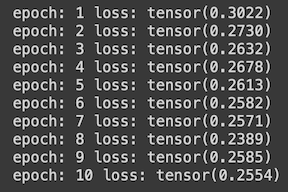

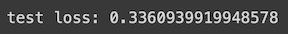

SGD Optimizer and 20 epochs (No L2 Regularization. We can see a fluctuation, reason for the weight_decay implementation):

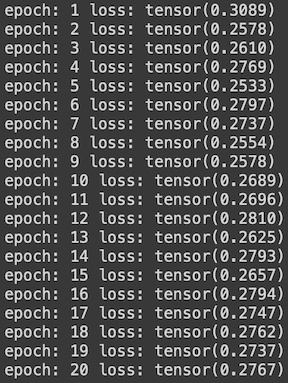

SGD Optimizer 20 epochs with L2 Regularization:

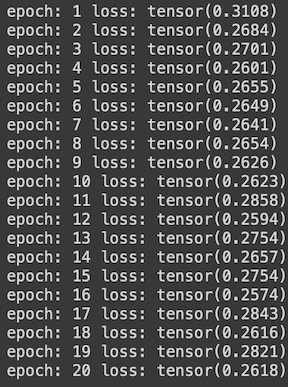

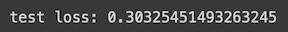

### RBM Model - Adam Optimizer

In [ ]:
epochs = 40

for epoch in range(1, epochs + 1):
    train_loss = 0
    s = 0.
    for v0, _ in train_loader:
        vk = v0.clone()
        ph0,_ = rbm_adam.sample_h(v0)
        for k in range(10):
            _,hk = rbm_adam.sample_h(vk)
            _,vk = rbm_adam.sample_v(hk)
            vk[v0<0] = v0[v0<0]
        phk,_ = rbm_adam.sample_h(vk)
        with torch.no_grad():
            train_loss += rbm_adam.train(v0, vk, ph0, phk)
        s += 1.

    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

epoch: 1 loss: tensor(0.2972)
epoch: 2 loss: tensor(0.2758)
epoch: 3 loss: tensor(0.2830)
epoch: 4 loss: tensor(0.2571)
epoch: 5 loss: tensor(0.2744)
epoch: 6 loss: tensor(0.2589)
epoch: 7 loss: tensor(0.2764)
epoch: 8 loss: tensor(0.2794)
epoch: 9 loss: tensor(0.2666)
epoch: 10 loss: tensor(0.2731)
epoch: 11 loss: tensor(0.2660)
epoch: 12 loss: tensor(0.2659)
epoch: 13 loss: tensor(0.2621)
epoch: 14 loss: tensor(0.2748)
epoch: 15 loss: tensor(0.2711)
epoch: 16 loss: tensor(0.2860)
epoch: 17 loss: tensor(0.2674)
epoch: 18 loss: tensor(0.2738)
epoch: 19 loss: tensor(0.2668)
epoch: 20 loss: tensor(0.2641)
epoch: 21 loss: tensor(0.2716)
epoch: 22 loss: tensor(0.2696)
epoch: 23 loss: tensor(0.2695)
epoch: 24 loss: tensor(0.2586)
epoch: 25 loss: tensor(0.2790)
epoch: 26 loss: tensor(0.2635)
epoch: 27 loss: tensor(0.2655)
epoch: 28 loss: tensor(0.2591)
epoch: 29 loss: tensor(0.2789)
epoch: 30 loss: tensor(0.2695)
epoch: 31 loss: tensor(0.2735)
epoch: 32 loss: tensor(0.2574)
epoch: 33 loss: t

In [ ]:
test_loss = 0
s = 0.

for v0, _ in test_loader:
    vk = v0.clone()
    ph0, _ = rbm_adam.sample_h(v0)
    for k in range(10):
        _, hk = rbm_adam.sample_h(vk)
        _, vk = rbm_adam.sample_v(hk)
    diff = torch.abs(v0 - vk)
    test_loss += torch.mean(diff[vk >= 0])
    s += 1.

print('test loss: '+str((test_loss / s).item()))

test loss: 0.3124616742134094


### RBM Model - Adam Optimizer Results

Adam Optimizer 10 epochs with L2 regularization:

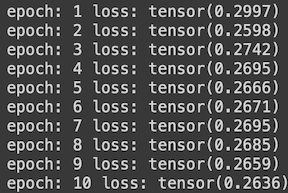

Screenshot 2023-06-14 at 7.41.22 PM.png

Adam optimizer 20 epochs with L2 regularization:

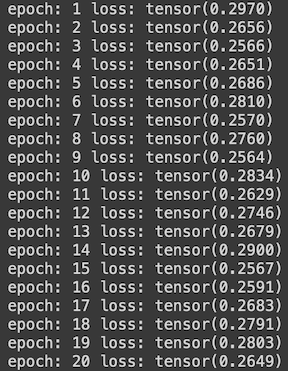

Screenshot 2023-06-14 at 7.58.04 PM.png

### No Regularization - RBM Optimizer Experiment

In [ ]:
class RBM2():
  def __init__(self, nv, nh, optimizer, lr, weight_decay):
    self.W = torch.nn.Parameter(torch.randn(nh, nv))
    self.a = torch.nn.Parameter(torch.randn(1, nh))
    self.b = torch.nn.Parameter(torch.randn(1, nv))
    self.optimizer = optimizer([self.W, self.a, self.b], lr=lr, weight_decay=weight_decay) # RBM1' object has no attribute 'parameters'

  def sample_h(self, x):
    wx = torch.mm(x, self.W.t())
    activation = wx + self.a.expand_as(wx)
    p_h_given_v = torch.sigmoid(activation)
    return p_h_given_v, torch.bernoulli(p_h_given_v)

  def sample_v(self, y):
    wy = torch.mm(y, self.W)
    activation = wy + self.b.expand_as(wy)
    p_v_given_h = torch.sigmoid(activation)
    return p_v_given_h, torch.bernoulli(p_v_given_h)

  def train(self, v0, vk, ph0, phk):
    self.optimizer.zero_grad()
    self.W += (torch.mm(v0.t(), ph0) - torch.mm(vk.t(), phk)).t()
    self.b += torch.sum((v0 - vk), 0)
    self.a += torch.sum((ph0 - phk), 0)
    self.optimizer.step()
    loss = torch.mean((v0 - vk) ** 2)
    return loss

nv = X_train_torch.shape[1] # visible nodes -> 14
nh = 100
batch_size = 100
lr = 0.01
weight_decay = 0.0

In [ ]:
rbm_adam2 = RBM2(nv, nh, sgd_optimizer, lr, weight_decay)

In [ ]:
epochs = 20

for epoch in range(1, epochs + 1):
    train_loss = 0
    s = 0.
    for v0, _ in train_loader:
        vk = v0.clone()
        ph0,_ = rbm_adam2.sample_h(v0)
        for k in range(10):
            _,hk = rbm_adam2.sample_h(vk)
            _,vk = rbm_adam2.sample_v(hk)
            vk[v0<0] = v0[v0<0]
        phk,_ = rbm_adam2.sample_h(vk)
        with torch.no_grad():
            train_loss += rbm_adam2.train(v0, vk, ph0, phk)
        s += 1.

    print('epoch: '+str(epoch)+' loss: '+str(train_loss/s))

epoch: 1 loss: tensor(0.3049)
epoch: 2 loss: tensor(0.2609)
epoch: 3 loss: tensor(0.2656)
epoch: 4 loss: tensor(0.2796)
epoch: 5 loss: tensor(0.2597)
epoch: 6 loss: tensor(0.2877)
epoch: 7 loss: tensor(0.2617)
epoch: 8 loss: tensor(0.2740)
epoch: 9 loss: tensor(0.2733)
epoch: 10 loss: tensor(0.2732)
epoch: 11 loss: tensor(0.2579)
epoch: 12 loss: tensor(0.2768)
epoch: 13 loss: tensor(0.2718)
epoch: 14 loss: tensor(0.2706)
epoch: 15 loss: tensor(0.2819)
epoch: 16 loss: tensor(0.2674)
epoch: 17 loss: tensor(0.2651)
epoch: 18 loss: tensor(0.2631)
epoch: 19 loss: tensor(0.2788)
epoch: 20 loss: tensor(0.2651)


In [ ]:
test_loss = 0
s = 0.

for v0, _ in test_loader:
    vk = v0.clone()
    ph0, _ = rbm_adam2.sample_h(v0)
    for k in range(10):
        _, hk = rbm_adam2.sample_h(vk)
        _, vk = rbm_adam2.sample_v(hk)
    diff = torch.abs(v0 - vk)
    test_loss += torch.mean(diff[vk >= 0])
    s += 1.

print('test loss: '+str((test_loss / s).item()))

test loss: 0.3320237398147583


## Question 3 - Overall Results from RBM Model (Observations):

The purpose of regularization and trying different epochs was to try and minimize the loss in order to get more accurate results. However, it looks like the model might be suffering from couple of fluctuations due the architecture of its own nature. This is my first time working with this type of model and its implementations. After trying 2 optimizers (SGD vs Adam) and 10, 20, 40, and even 50 to 100 epochs in one experiment, `my best result came from Adam Optimizer 20 epochs and L2 regularization -> test loss of 0.2896.` As we can see, the optimizers and different epochs gave different/mixed results, but at the end Adam optimizer gave the best results using L2 regularization along with 20 epochs instead of 10. I personally didn’t feel the need of creating dataframes to shows results in this sections due to the simplicity for the results and there observations.

## AutoEncoder Model

- This is unsupervised learning.

These are neural networks that aim to copy their inputs to their outputs. They work by compressing the input into a latent-space representation, then reconstructing the output from this representation.

The network is composed of `Encoder` and `Decoder`. The AutoEncoders consist of an input, a hidden and output layer.

Autoenocders input equals the output in the hidden layer. It reconstructs the error using back-propagation, which computes the “error signal”, then propagates the error backwards through network that starts at the output units by using the condition that the error forms the difference between the actual and desired output values.

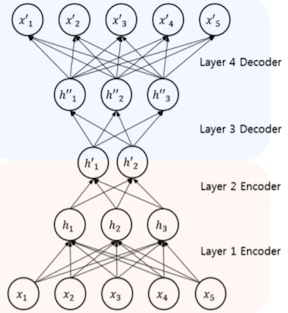

In the case of fraud Detection, banks transfer the input (money related information), then the AutoEncoders use past behavior to be trained first, and then uses the new coming transaction as a validation test for the transaction.

In [ ]:
# TensorFlow Auto Encoder
# Splitting the data just as the RBM model

X = df.drop('Class', axis=1)  # Input data
y = df['Class']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The Colab tutorial explains that the AutoEncoder will be trained only on non-fraudulent cases

In [ ]:
X_train_normal = X_train[y_train==0]
X_train_fraud = X_train[y_train==1]

Again, I use the same preprocessing step in order to work the AutoEncoder TensorFlow Algorithm. The reason I decided to use TensorFlow is because I felt it was easier for me to understand better the problem that was being asked.  The architecture consists of 2 dense layers:
-	First dense layer has 20 units and ReLU activation function.
-	Second activation layer 14 units which consists of columns A1 all the way to A14. It also has the sigmoid activation function.
The call function takes x (input) and passes I through encoder and decoder in sequence.

I also decided to use the architecture of another tutorial, I really wanted to use ReLU and Sigmoid activation functions and not “Tanh” function. Plus the Colab tutorial had a more basic architecture and I wanted something a little bit elaborated.

- `Relu Activation Function` (Rectified Activation Function): With default values, this returns the standard ReLU activation: max(x, 0), the element-wise maximum of 0 and the input tensor.

$$ReLU(x) = (x)^+ = \max(0, x)$$

- `Sigmoid Activation Function` Will always returns a value between 0 and 1.

$$\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + e^{-x}}$$

Latex formulas came from previous homework and Appliead Machine Learning coursework. I will also conduct an experiment using the Colab's architecture and compare losses.

In [ ]:
class AutoEncoder(Model):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(20, activation="relu"),
      tf.keras.layers.Dense(10, activation="relu")
    ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(20, activation="relu"),
      tf.keras.layers.Dense(14, activation="sigmoid") # columns from A1 to A14
    ])

  def call(self, x):
    encoded = self.encoder(x) # dimensionality reduction
    decoded = self.decoder(encoded) # reconstruct original input
    return decoded

Optimizers SGD and Adam:

In [ ]:
sgd_optimizer = tf.keras.optimizers.SGD()
adam_optimizer = tf.keras.optimizers.Adam()

### AutoEncoder Model - SGD Optimizer

In [ ]:
model = AutoEncoder()
model.compile(optimizer=sgd_optimizer,loss='mean_squared_error')

In [ ]:
# results from using 200 epochs
model.fit(X_train_normal, X_train_normal, epochs = 200, batch_size=128, # 100, # 150, #200
validation_data=(X_train_normal,X_train_normal))

Epoch 1/200
3/3 [==============================] - 1s 126ms/step - loss: 0.1792 - val_loss: 0.1791
Epoch 2/200
3/3 [==============================] - 0s 28ms/step - loss: 0.1790 - val_loss: 0.1789
Epoch 3/200
3/3 [==============================] - 0s 25ms/step - loss: 0.1789 - val_loss: 0.1787
Epoch 4/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1787 - val_loss: 0.1786
Epoch 5/200
3/3 [==============================] - 0s 63ms/step - loss: 0.1785 - val_loss: 0.1784
Epoch 6/200
3/3 [==============================] - 0s 78ms/step - loss: 0.1784 - val_loss: 0.1782
Epoch 7/200
3/3 [==============================] - 0s 27ms/step - loss: 0.1782 - val_loss: 0.1781
Epoch 8/200
3/3 [==============================] - 0s 42ms/step - loss: 0.1780 - val_loss: 0.1779
Epoch 9/200
3/3 [==============================] - 0s 26ms/step - loss: 0.1779 - val_loss: 0.1777
Epoch 10/200
3/3 [==============================] - 0s 34ms/step - loss: 0.1777 - val_loss: 0.1776
Epoch 11/200
3/3 [

In [ ]:
model.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                510       
                                                                 
 sequential_1 (Sequential)   (None, 14)                514       
                                                                 
Total params: 1,024
Trainable params: 1,024
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# based on 200 epochs
predictions = model.predict(X_train)

mse = np.mean(np.power(X_train - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_train})


error_df.groupby('true_class').describe()

18/18 [==============================] - 0s 917us/step


reconstruction_error                                          \
                          count      mean       std       min       25%   
true_class                                                                
0.0                       296.0  0.158556  0.018454  0.120286  0.145402   
1.0                       256.0  0.146774  0.017367  0.102419  0.134147   

                                          
                 50%       75%       max  
true_class                                
0.0         0.156233  0.170117  0.222002  
1.0         0.145192  0.159360  0.210988

In [ ]:
# based on 200 epochs
y_pred = model.predict(X_test) # predicting

mse = np.mean(np.power(X_test - y_pred, 2), axis=1) # calculating the MSE

# DF with reconstruction error and true class labels
test_error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

# Group by true_class and use describe() to see summary statistics
test_error_df.groupby('true_class').describe()

5/5 [==============================] - 0s 1ms/step


reconstruction_error                                          \
                          count      mean       std       min       25%   
true_class                                                                
0.0                        87.0  0.158143  0.018572  0.117521  0.143300   
1.0                        51.0  0.149595  0.016255  0.121683  0.139979   

                                          
                 50%       75%       max  
true_class                                
0.0         0.156757  0.172571  0.198914  
1.0         0.147990  0.157936  0.199108

The above dataframe is group by the true class (y_test). We have a count of 87 for class 0 and 51 for class 1, we can also see the summary statistics regarding reconstuction error for each class. By doing this, we can analyze the distribuition of each class (that's why I liked the Colab TensorFlow tutorial regarding AutoEncoders).

In [ ]:
# 200 epochs results
test_loss = np.mean(mse)
print('The test loss for the AutoEncoder Tensorflow model is:', test_loss) # test loss of SGD optimizer

The test loss for the AutoEncoder Tensorflow model is: 0.15498395358165812


### AutoEncoder Model - SGD Optimizer Results
**(Please see Question 3: AutoEncoder Results DataFrames)**

- Results using 100 epochs and SGD optimizer:

`Training`

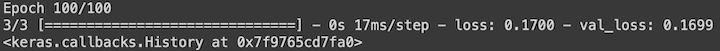

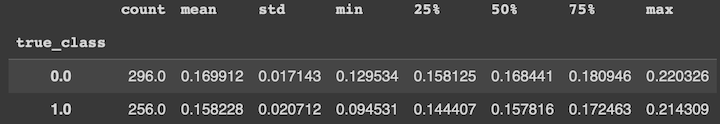

`Testing`:

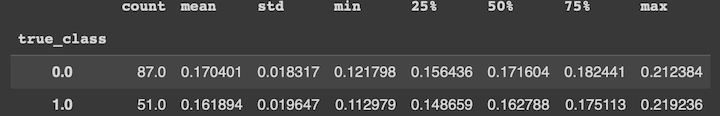

image.png

- Results using 150 epochs and SGD optimizer:

`Training`

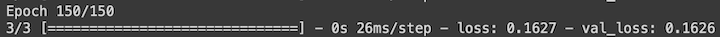

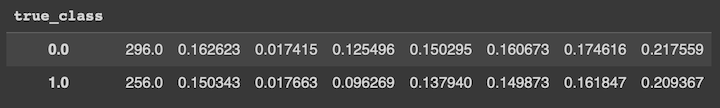

`Testing`

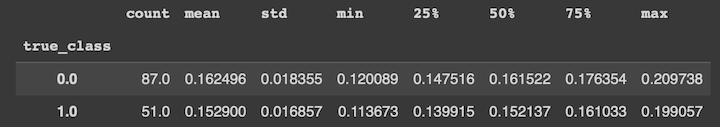

Screenshot 2023-06-15 at 4.47.41 PM.png

### AutoEncoder Model - Adam Optimizer

In [ ]:
model = AutoEncoder()
model.compile(optimizer=adam_optimizer,loss='mean_squared_error')

In [ ]:
# based on 200 epochs
model.fit(X_train_normal, X_train_normal, epochs = 200, batch_size=128, # 100, # 150, #200
validation_data=(X_train_normal,X_train_normal))

Epoch 1/200
3/3 [==============================] - 4s 412ms/step - loss: 0.1760 - val_loss: 0.1734
Epoch 2/200
3/3 [==============================] - 0s 87ms/step - loss: 0.1727 - val_loss: 0.1703
Epoch 3/200
3/3 [==============================] - 0s 75ms/step - loss: 0.1697 - val_loss: 0.1675
Epoch 4/200
3/3 [==============================] - 0s 52ms/step - loss: 0.1668 - val_loss: 0.1647
Epoch 5/200
3/3 [==============================] - 0s 57ms/step - loss: 0.1641 - val_loss: 0.1622
Epoch 6/200
3/3 [==============================] - 0s 58ms/step - loss: 0.1616 - val_loss: 0.1597
Epoch 7/200
3/3 [==============================] - 0s 67ms/step - loss: 0.1591 - val_loss: 0.1572
Epoch 8/200
3/3 [==============================] - 0s 91ms/step - loss: 0.1567 - val_loss: 0.1548
Epoch 9/200
3/3 [==============================] - 0s 56ms/step - loss: 0.1542 - val_loss: 0.1524
Epoch 10/200
3/3 [==============================] - 0s 53ms/step - loss: 0.1518 - val_loss: 0.1499
Epoch 11/200
3/3 [

In [ ]:
model.summary()

Model: "auto_encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 10)                510       
                                                                 
 sequential_1 (Sequential)   (None, 14)                514       
                                                                 
Total params: 1,024
Trainable params: 1,024
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# based on 200 epochs
predictions = model.predict(X_train) # predicting

mse = np.mean(np.power(X_train - predictions, 2), axis=1) # calculating MSE

# DF with reconstruction error and true class labels
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_train})

# Group by true_class and use describe() to see summary statistics
error_df.groupby('true_class').describe()

18/18 [==============================] - 0s 1ms/step


reconstruction_error                                          \
                          count      mean       std       min       25%   
true_class                                                                
0.0                       296.0  0.010293  0.008408  0.000588  0.004772   
1.0                       256.0  0.016386  0.016042  0.001537  0.007568   

                                          
                 50%       75%       max  
true_class                                
0.0         0.008256  0.014423  0.066001  
1.0         0.012228  0.019530  0.166744

In [ ]:
# based on 200 epochs
y_pred = model.predict(X_test) # predicting


mse = np.mean(np.power(X_test - y_pred, 2), axis=1) # MSE

# DF with reconstruction error and true class labels
test_error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

# Group by true_class and use describe() to see summary statistics
test_error_df.groupby('true_class').describe()

5/5 [==============================] - 0s 2ms/step


reconstruction_error                                          \
                          count      mean       std       min       25%   
true_class                                                                
0.0                        87.0  0.013347  0.011543  0.000375  0.004725   
1.0                        51.0  0.021185  0.027401  0.004274  0.008072   

                                         
                 50%      75%       max  
true_class                               
0.0         0.011325  0.01763  0.070884  
1.0         0.011356  0.02110  0.167167

In [ ]:
test_loss = np.mean(mse) # 200 epochs
print('The test loss for the AutoEncoder Tensorflow model (Adam optimizer) is:', test_loss) # test loss for Adam optimizer

The test loss for the AutoEncoder Tensorflow model (Adam optimizer) is: 0.016243711907259598


### AutoEncoder Model - Adam Optimizer Results
**(Please see Question 3: AutoEncoder Results DataFrames)**

- Results using 100 epochs and Adam optimizer:

`Training`

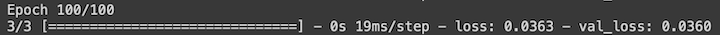

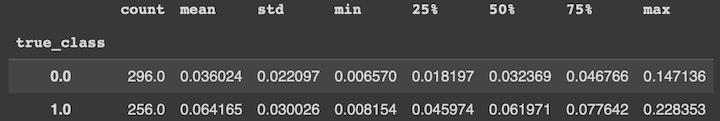

`Testing`

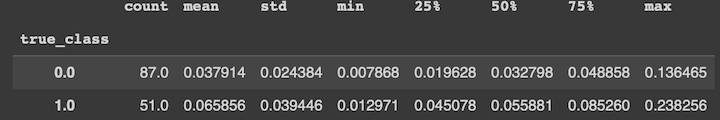

image.png


- Results using 150 epochs and Adam optimizer:

`Training`

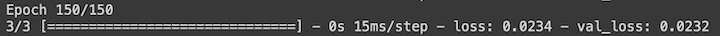

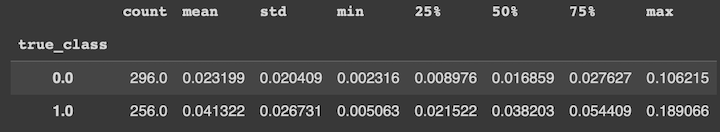

`Testing`

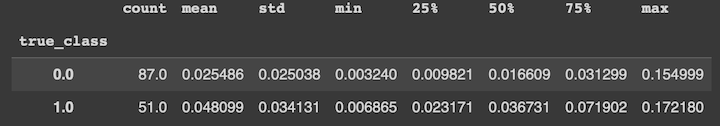

image.png

### AutoEncoder Colab Model using Tanh

The colab tutorial uses the above model architecture. It also has an input shape of 14 due to the columns instead of the 29 (input shape within tutorial notebook). Its simpler and instead of using the ReLU activation function, it uses Tanh.

In [ ]:
input_layer = Input(shape=(14, ))
encoded = Dense(12,activation='tanh')(input_layer)
decoded = Dense(14,activation='sigmoid')(encoded) # just changed the input shape to use 14 (column numbers) instead of 29
autoencoder_m2 = Model(input_layer,decoded)

In [ ]:
autoencoder_m2.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
# based on 200 epochs
autoencoder_m2.fit(X_train_normal, X_train_normal, epochs = 200, batch_size=128, # 100, # 150, #200
validation_data=(X_train_normal,X_train_normal))

Epoch 1/200
3/3 [==============================] - 1s 141ms/step - loss: 0.1738 - val_loss: 0.1718
Epoch 2/200
3/3 [==============================] - 0s 21ms/step - loss: 0.1712 - val_loss: 0.1693
Epoch 3/200
3/3 [==============================] - 0s 25ms/step - loss: 0.1687 - val_loss: 0.1668
Epoch 4/200
3/3 [==============================] - 0s 21ms/step - loss: 0.1662 - val_loss: 0.1643
Epoch 5/200
3/3 [==============================] - 0s 25ms/step - loss: 0.1637 - val_loss: 0.1619
Epoch 6/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1613 - val_loss: 0.1595
Epoch 7/200
3/3 [==============================] - 0s 25ms/step - loss: 0.1589 - val_loss: 0.1571
Epoch 8/200
3/3 [==============================] - 0s 30ms/step - loss: 0.1565 - val_loss: 0.1547
Epoch 9/200
3/3 [==============================] - 0s 17ms/step - loss: 0.1541 - val_loss: 0.1523
Epoch 10/200
3/3 [==============================] - 0s 18ms/step - loss: 0.1517 - val_loss: 0.1499
Epoch 11/200
3/3 [

In [ ]:
autoencoder_m2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 14)]              0         
                                                                 
 dense_2 (Dense)             (None, 12)                180       
                                                                 
 dense_3 (Dense)             (None, 14)                182       
                                                                 
Total params: 362
Trainable params: 362
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# based on 200 epochs
predictions = autoencoder_m2.predict(X_train) # predicting

mse = np.mean(np.power(X_train - predictions, 2), axis=1) # calculating MSE

# DF with reconstruction error and true class labels
error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_train})

# Group by true_class and use describe() to see summary statistics
error_df.groupby('true_class').describe()

18/18 [==============================] - 0s 1ms/step


reconstruction_error                                          \
                          count      mean       std       min       25%   
true_class                                                                
0.0                       296.0  0.041041  0.019847  0.011960  0.026582   
1.0                       256.0  0.060783  0.021129  0.012784  0.046450   

                                          
                 50%       75%       max  
true_class                                
0.0         0.036704  0.053480  0.113457  
1.0         0.058701  0.072778  0.174665

In [ ]:
# based on 200 epochs
y_pred = autoencoder_m2.predict(X_test) # predicting


mse = np.mean(np.power(X_test - y_pred, 2), axis=1) # MSE

# DF with reconstruction error and true class labels
test_error_df = pd.DataFrame({'reconstruction_error': mse, 'true_class': y_test})

# Group by true_class and use describe() to see summary statistics
test_error_df.groupby('true_class').describe()

5/5 [==============================] - 0s 2ms/step


reconstruction_error                                          \
                          count      mean       std       min       25%   
true_class                                                                
0.0                        87.0  0.043473  0.022057  0.011649  0.027708   
1.0                        51.0  0.062252  0.030873  0.018562  0.043693   

                                          
                 50%       75%       max  
true_class                                
0.0         0.044223  0.053237  0.139219  
1.0         0.055062  0.069528  0.193064

In [ ]:
test_loss = np.mean(mse) # 200 epochs
print('The test loss for the Colab AutoEncoder Tensorflow model (Adam optimizer and Tanh) is:', test_loss) # test loss for Adam optimizer

The test loss for the Colab AutoEncoder Tensorflow model (Adam optimizer and Tanh) is: 0.05041293706632506


### Question 3 AutoEncoder Results Dataframes:



#### AutoEncoder SGD DF Result

In [ ]:
df1 = pd.DataFrame()

rows = ['AutoEncoder SGD Optimizer', 'AutoEncoder SGD Optimizer', 'AutoEncoder SGD Optimizer']
epochs = [100, 150, 200]

df1['Epochs'] = epochs
df1['Train Loss'] = [0.1700, 0.1627, 0.1586]
df1['Validation Loss'] = [0.1699, 0.1626, 0.1586]
df1['Test Loss'] = [0.1673, 0.1589, 0.1550]

df1.index = rows

df1_sorted = df1.sort_values(by='Test Loss')
best_result = df1_sorted.iloc[0]
best_epoch = best_result['Epochs']
lowest_test_loss = best_result['Test Loss']

df1_sorted

,Epochs,Train Loss,Validation Loss,Test Loss
AutoEncoder SGD Optimizer,200,0.1586,0.1586,0.1550
AutoEncoder SGD Optimizer,150,0.1627,0.1626,0.1589
AutoEncoder SGD Optimizer,100,0.1700,0.1699,0.1673


In [ ]:
print(f'Best results came from {best_epoch} epochs with a Test Loss of: {lowest_test_loss}')

Best results came from 200.0 epochs with a Test Loss of: 0.155


The goal here is to play with epochs and optimizers in order to get the lowest test value. In the case of the SGD Optimizer model, we can see that the lowest Test value of 1.550 came from epoch 200. Increasing the number of epochs was enough to decrease the test loss. This indicates that we have an improved performance in reconstructing the input data.

The recunstruction error and true class dataframe is group by the true class (y_test). We have a count of 87 for class 0 and 51 for class 1, we can also see the summary statistics regarding reconstuction error for each class. By doing this, we can analyze the distribuition of each class.

#### AutoEncoder Adam DF Result

In [ ]:
df2 = pd.DataFrame()

rows = ['AutoEncoder Adam Optimizer', 'AutoEncoder Adam Optimizer', 'AutoEncoder Adam Optimizer', 'AutoEncoder Colab Adam Optimizer']
epochs = [100, 150, 200, 200]

df2['Epochs'] = epochs
df2['Train Loss'] = [0.0363, 0.0234, 0.0104, 0.0412]
df2['Validation Loss'] = [0.0360, 0.0232, 0.0103, 0.0410]
df2['Test Loss'] = [0.0482, 0.0338, 0.0162, 0.0504]

df2.index = rows

df2_sorted = df2.sort_values(by='Test Loss')
best_result = df2_sorted.iloc[0]
best_epoch = best_result['Epochs']
lowest_test_loss = best_result['Test Loss']

df2_sorted

,Epochs,Train Loss,Validation Loss,Test Loss
AutoEncoder Adam Optimizer,200,0.0104,0.0103,0.0162
AutoEncoder Adam Optimizer,150,0.0234,0.0232,0.0338
AutoEncoder Adam Optimizer,100,0.0363,0.0360,0.0482
AutoEncoder Colab Adam Optimizer,200,0.0412,0.0410,0.0504


In [ ]:
print(f'Best results came from {best_epoch} epochs with a Test Loss of: {lowest_test_loss}')

Best results came from 200.0 epochs with a Test Loss of: 0.0162


In the case of the AutoEncoder Adam Optimizer model, we can see that the lowest test loss of 0.0162 came from epoch 200. As we already know, this optimizer tends to give better results in terms of performance. The dataframe also shows the Colab tutorial which gave a test loss of 0.0504. This `“AutoEncoder Colab Adam Optimizer”` was using Tanh activation function while the implementation I choose used ReLU activation function. The implementation that I choose return an overall better score. Just like the SGD Results, we have a reconstruction error dataframe grouped by the true labels that show data distribution regarding class 0 and class 1. I decided to implement this technique, because it also shows how well the model is able to reconstruct the data for each class and show the difference between them.

The overall results regarding the AutoEncoder optimizers came from -> `Best results using 200 epochs with a Test Loss of: 0.0162`.

I wish I could incorporate more metrics like graphs regarding losses, classification reports, and even confusion matrices and explore more in depth these models. Due to personal time schedule and lack of knowledge, I will only provide training, validation, and test losses this time.

# References:

- Fraud detection: https://medium.com/analytics-vidhya/credit-card-fraud-detection-using-restricted-boltzmann-machines-rbm-5e2c32f3c346

- EDA basic: https://www.learndatasci.com/glossary/binary-classification/

- Preprocessing: https://www.geeksforgeeks.org/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/

- Preprocessing: https://stackoverflow.com/questions/59538006/scaling-data-frame-with-numeric-and-categorical

- duplicates: https://www.w3schools.com/python/pandas/ref_df_duplicated.asp

- Tutorial: https://towardsdatascience.com/credit-card-fraud-detection-using-machine-learning-python-5b098d4a8edc


- torch.tensor: https://pytorch.org/docs/stable/tensors.html

- PyTorch dataset/toTensor: https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

- Tensor Dataset: https://pytorch.org/docs/stable/data.html#torch.utils.data.TensorDataset

- DataLoder train_loader: https://www.leaky.ai/dataloader

- isinstance: https://www.w3schools.com/python/ref_func_isinstance.asp

- Training RBM model: https://staff.fnwi.uva.nl/e.peerbooms/rbm.html

- Autograd: https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95

- no_grad: https://pytorch.org/docs/stable/generated/torch.no_grad.html

- RBM Architecture: https://medium.com/machine-learning-researcher/boltzmann-machine-c2ce76d94da5#:~:text=4.-,How%20do%20Restricted%20Boltzmann%20Machine%20Work%3F,called%20a%20Deep%20Belief%20Network

- torch.nn.Parameter: https://stackoverflow.com/questions/50935345/understanding-torch-nn-parameter

- PyTorch clone(): https://pytorch.org/docs/stable/generated/torch.clone.html

- PyTorch - clone() vs copy(): https://discuss.pytorch.org/t/copy-deepcopy-vs-clone/55022

- Regularization: https://medium.com/unpackai/stay-away-from-overfitting-l2-norm-regularization-weight-decay-and-l1-norm-regularization-795bbc5cf958

- zero_grad: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch

- PyTorch .item(): https://pytorch.org/docs/stable/generated/torch.Tensor.item.html

- AutoEncoder Colab Tutorial: https://colab.research.google.com/drive/1VEDzEPB6RCBJ5b1xXJmj0hVwOAiObjsf#scrollTo=qzcu7y3nxsw3

- AutoEncoder class: https://www.analyticsvidhya.com/blog/2022/01/complete-guide-to-anomaly-detection-with-autoencoders-using-tensorflow/

- Python DF sort_values: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html